In [4]:
import numpy as np 
import pandas as pd
#ignore the warnings
import warnings
warnings.filterwarnings('ignore')
%config IPCompleter.greedy=True

In [5]:
df = pd.read_csv("ZomatoData.csv", encoding='latin')

In [6]:
df.shape #print number of rows and columns

(9551, 19)

In [7]:
df.head() #printing top 5 rows

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [8]:
df.tail() #printing last 5 rows

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,Turkish Lira(TL),No,No,No,No,3,788,80,4.1
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,3,1034,105,4.2
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,4,661,170,3.7
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,Turkish Lira(TL),No,No,No,No,4,901,120,4.0
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,Turkish Lira(TL),No,No,No,No,2,591,55,4.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [10]:
df.describe(include="all")

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


In [11]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating'],
      dtype='object')

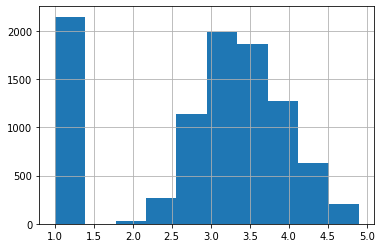

In [12]:
df['Rating'].hist() #distribution of target variable is acceptable

Basic EDA

In [13]:
df.isnull().sum() #There are no missing values 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
dtype: int64

In [14]:

df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

In [15]:
round(df.describe(),ndigits=2)

,Restaurant ID,Country Code,Longitude,Latitude,Price range,Votes,Average Cost for two,Rating
count,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00,9551.00
mean,9051128.35,18.37,64.13,25.85,1.80,156.91,1199.21,2.89
std,8791521.28,56.75,41.47,11.01,0.91,430.17,16121.18,1.13
min,53.00,1.00,-157.95,-41.33,1.00,0.00,0.00,1.00
25%,301962.50,1.00,77.08,28.48,1.00,5.00,250.00,2.50
50%,6004089.00,1.00,77.19,28.57,2.00,31.00,400.00,3.20
75%,18352291.50,1.00,77.28,28.64,2.00,131.00,700.00,3.70
max,18500652.00,216.00,174.83,55.98,4.00,10934.00,800000.00,4.90


In [16]:
#All above continuous variables are selected based on basic eda results

In [17]:
def PlotBarCharts(inpData, columns):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(columns), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(columns))

    for colName, plotNumber in zip(columns, range(len(columns))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

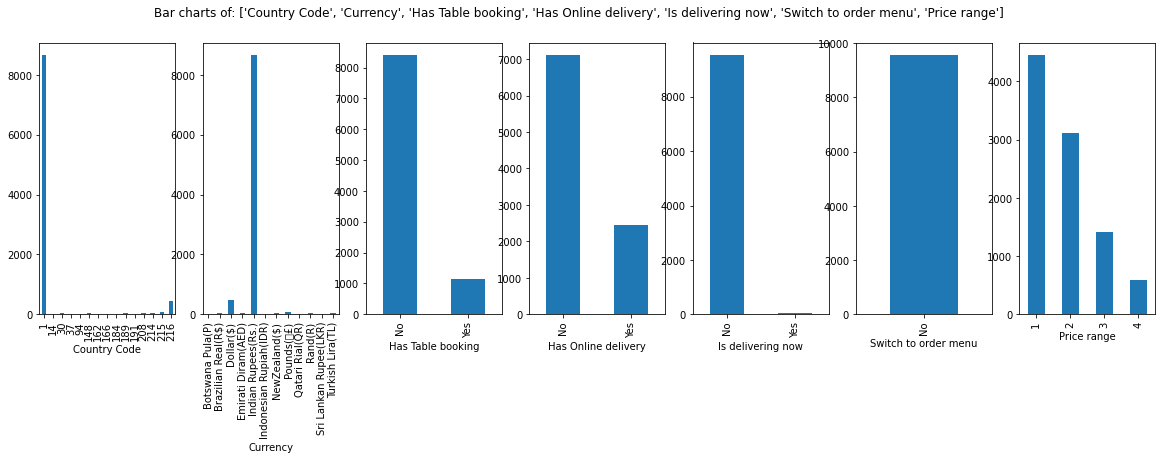

In [18]:
PlotBarCharts(inpData=df, columns=['Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now',
    'Switch to order menu','Price range'])

Selected Categorical Variables: Only three categorical variables are selected for further analysis.

'Has Table booking', 'Has Online delivery', 'Price range'

**Visualize distribution of all the Continuous Predictor variables in the data using histograms**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc193267d0>,
      dtype=object)

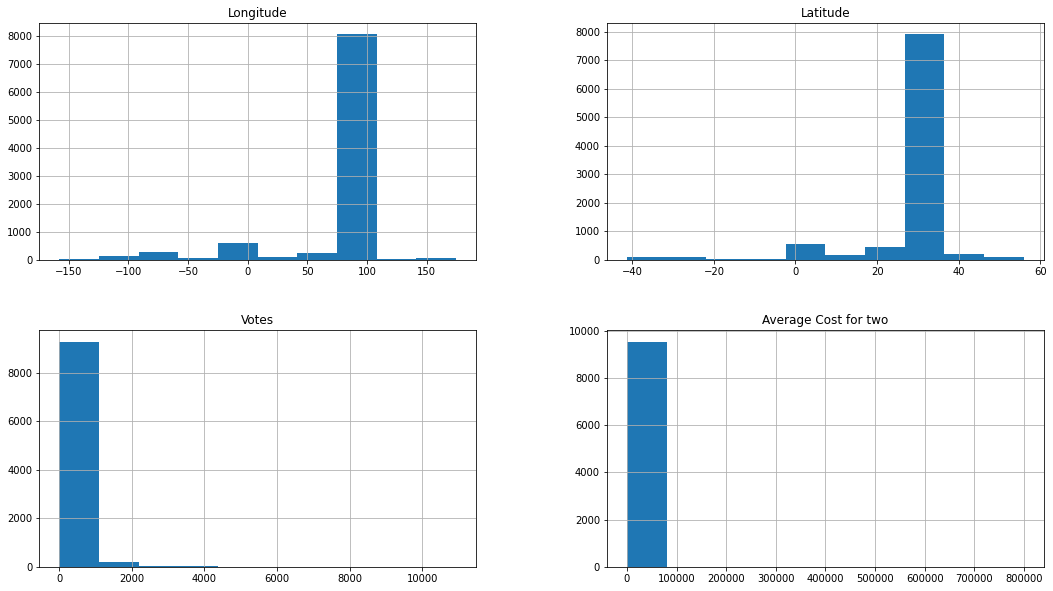

In [19]:
df.hist(['Longitude', 'Latitude', 
                 'Votes', 'Average Cost for two'], figsize=(18,10))

In [20]:
#in votes and average cost for two outliers are seen rest two are proper

**Outlier treatment**

In [21]:
df['Votes'][df['Votes']>4000] #outliers

728     10934
735      9667
736      5385
739      6907
743      5705
1252     4385
2307     5434
2410     4464
2411     5288
2412     7574
2414     5966
2480     5145
3085     4914
3110     5172
3336     4085
3994     7931
4178     4689
4638     4986
6144     4373
Name: Votes, dtype: int64

In [22]:
len(df['Votes'][df['Votes']>4000])

19

In [23]:
df['Votes'][df['Votes']<4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

In [24]:
df['Votes'][df['Votes']>4000]=3986

In [25]:
len(df['Votes'][df['Votes']>4000]) #now no outliers

0

In [26]:
len(df['Average Cost for two'][df['Average Cost for two']>50000]) 

21

In [27]:
df.shape

(9551, 19)

In [28]:
df['Average Cost for two'][df['Average Cost for two']<50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
        ... 
85         0
87         0
240        0
397        0
9242       0
Name: Average Cost for two, Length: 9530, dtype: int64

In [29]:
df['Average Cost for two'][df['Average Cost for two']>50000]=8000

**Feature Selection**

**Relationship exploration: Continuous Vs Continuous -- Scatter Charts**

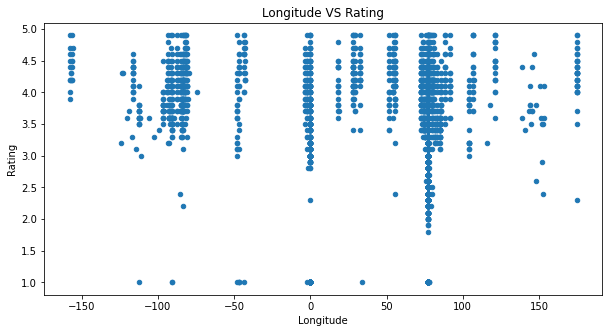

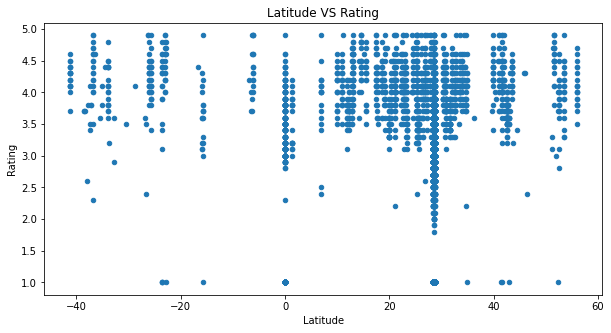

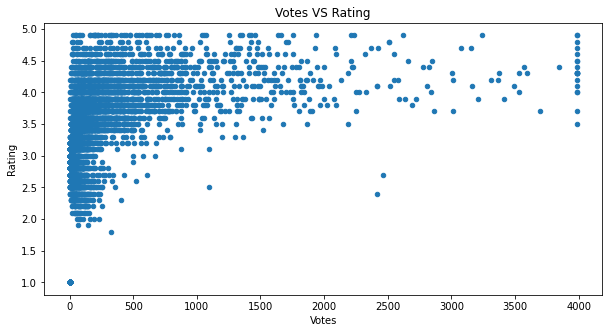

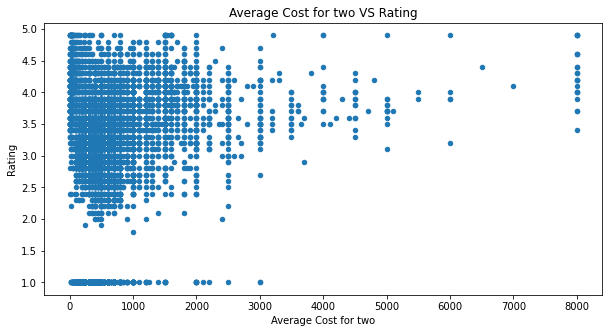

In [30]:
ContinuousCols=['Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='Rating', figsize=(10,5), title=predictor+" VS "+ 'Rating')

**Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**

In [31]:
ContinuousCols=['Rating','Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Creating the correlation matrix
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,Rating,Longitude,Latitude,Votes,Average Cost for two
Rating,1.000000,-0.145930,-0.019806,0.385249,0.248981
Longitude,-0.145930,1.000000,0.043207,-0.101381,0.210272
Latitude,-0.019806,0.043207,1.000000,-0.019687,-0.064748
Votes,0.385249,-0.101381,-0.019687,1.000000,0.245662
Average Cost for two,0.248981,0.210272,-0.064748,0.245662,1.000000


In [33]:
CorrelationData['Rating'][abs(CorrelationData['Rating']) > 0.2 ]

Rating                  1.000000
Votes                   0.385249
Average Cost for two    0.248981
Name: Rating, dtype: float64

Final selected Continuous columns:

'Votes', 'Average Cost for two'

**Relationship exploration: Categorical Vs Continuous -- Box Plots**

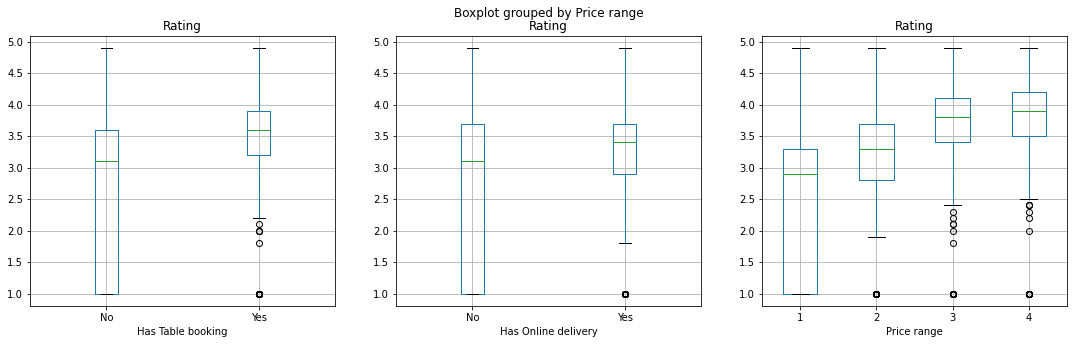

In [34]:
CategoricalColsList=['Has Table booking', 'Has Online delivery', 'Price range']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Rating"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='Rating', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [35]:
#all the three looks correlated we will check now annova test results

In [36]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [37]:
CategoricalPredictorList=['Has Table booking', 'Has Online delivery', 'Price range']
FunctionAnova(inpData=df, 
              TargetVariable='Rating', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Has Table booking is correlated with Rating | P-Value: 3.9393041304297214e-82
Has Online delivery is correlated with Rating | P-Value: 1.6952587420575958e-92
Price range is correlated with Rating | P-Value: 0.0


['Has Table booking', 'Has Online delivery', 'Price range']

Final selected Categorical columns:

'Has Table booking', 'Has Online delivery', 'Price range'

In [38]:
SelectedColumns=['Votes','Average Cost for two','Has Table booking',
                 'Has Online delivery','Price range']

# Selecting final columns
DataForML=df[SelectedColumns]
DataForML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,314,1100,Yes,No,3
1,591,1200,Yes,No,3
2,270,4000,Yes,No,4
3,365,1500,No,No,4
4,229,1500,Yes,No,4


In [39]:
DataForML.to_pickle('DataForML.pkl')

**Data Pre-processing for Machine Learning**

In [40]:
DataForML['Has Table booking'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Has Online delivery'].replace({'Yes':1, 'No':0}, inplace=True)

In [42]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Rating']=df['Rating']

# Printing sample rows
DataForML_Numeric.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8


**Machine Learning: Splitting the data into Training and Testing sample**

In [43]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'
Predictors=['Votes', 'Average Cost for two', 'Has Table booking',
           'Has Online delivery', 'Price range']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6685, 5)
(6685,)
(2866, 5)
(2866,)


**Multiple linear regression**

In [46]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.30651463134648727

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              2.0
1     4.1              3.0
2     3.2              3.0
3     4.4              3.0
4     3.5              2.0
Mean Accuracy on test data: 56.823823714822296
Median Accuracy on test data: 74.07407407407408

Accuracy values for 10-fold Cross Validation:
 [73.07128832 57.23634237 61.61405423 59.97790149 62.17608774 29.03036814
 48.84028175 51.06832392 40.27174351 53.61838933]

Final Average Accuracy of the model: 53.69


**Decision Tree**

DecisionTreeRegressor(criterion='mse', max_depth=6)
R2 Value: 0.9120831300688722

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2     3.2              3.0
3     4.4              4.0
4     3.5              3.0
Mean Accuracy on test data: 91.61407688871984
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [90.79867804 92.40734815 92.36096482 92.60045486 92.95525464 95.05770184
 93.713076   93.81800852 92.90082114 91.96501727]

Final Average Accuracy of the model: 92.86


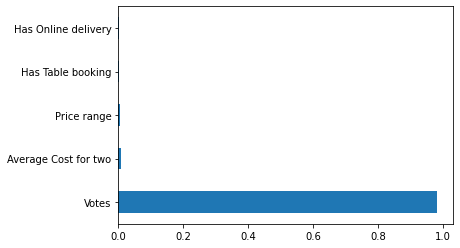

In [47]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**Random Forest Regressor**

RandomForestRegressor(criterion='mse', max_depth=2, n_estimators=400)
R2 Value: 0.8809494310079518

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2     3.2              3.0
3     4.4              4.0
4     3.5              3.0
Mean Accuracy on test data: 91.12543830148354
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [89.26671933 91.69112697 91.43780855 92.30242862 92.26374548 93.93380218
 92.57015546 92.86930126 91.77255875 90.06431171]

Final Average Accuracy of the model: 91.82


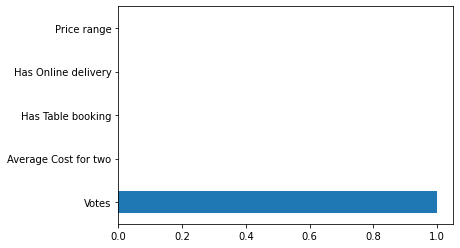

In [48]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**AdaBoost**

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=500)
R2 Value: 0.8953406904704492

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2     3.2              3.0
3     4.4              3.0
4     3.5              3.0
Mean Accuracy on test data: 91.56272520898233
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [90.34613477 91.81259026 91.54263404 92.40813855 92.50712999 94.25860148
 92.88547736 92.93458613 92.11965258 90.90007886]

Final Average Accuracy of the model: 92.17


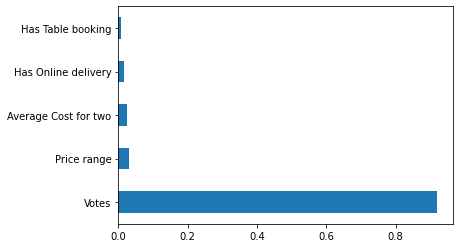

In [49]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

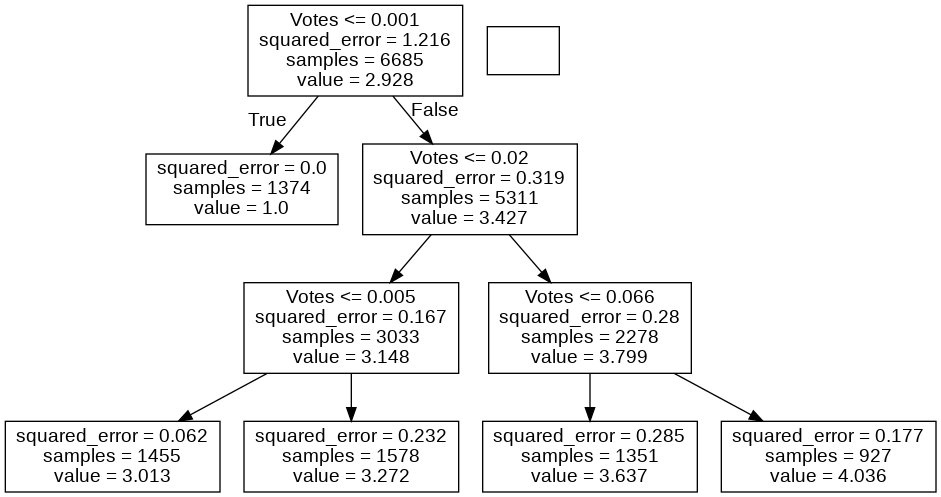

In [50]:
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=500,height=500)

**XGBoost**

XGBRegressor(max_depth=2, n_estimators=1000)
[08:55:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9244794006166799

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2     3.2              3.0
3     4.4              4.0
4     3.5              3.0
Mean Accuracy on test data: 91.71467342820453
Median Accuracy on test data: 93.75
[08:55:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:

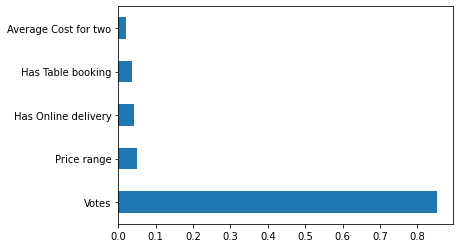

In [51]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

**KNN**

In [52]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9372887815995474

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              4.0
2     3.2              3.0
3     4.4              4.0
4     3.5              3.0
Mean Accuracy on test data: 90.07730832312123
Median Accuracy on test data: 93.75

Accuracy values for 10-fold Cross Validation:
 [88.6003456  90.53895067 90.73513889 91.56327544 91.49552541 94.16527504
 92.54270634 92.6357977  91.16962893 90.69932036]

Final Average Accuracy of the model: 91.41


**SVM**

In [53]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=5, kernel='rbf', degree=20, gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=5, degree=20, gamma=0.01)
R2 Value: 0.19800142672597365

##### Model Validation and Accuracy Calculations ##########
   Rating  PredictedRating
0     2.1              3.0
1     4.1              3.0
2     3.2              3.0
3     4.4              3.0
4     3.5              3.0
Mean Accuracy on test data: 46.370364870487315
Median Accuracy on test data: 85.71428571428572

Accuracy values for 10-fold Cross Validation:
 [77.64832576 51.54965552 58.55487796 55.89481688 60.36376546 12.31982336
 40.34489198 43.44098004 29.71786072 47.08634883]

Final Average Accuracy of the model: 47.69


**Deployment of the Model**

In [54]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Votes', 'Average Cost for two', 'Price range']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(9551, 3)
(9551,)


In [55]:
#Step 1. Retraining the model using 100% data


# choose from different tunable hyper parameters
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='mse')

# Training the model on 100% Data available
FinalDecisionTreeModel=RegModel.fit(X,y)

In [56]:
#Cross validating the final model accuracy with less predictors


# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(FinalDecisionTreeModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [90.88375632 92.62959923 92.20786898 92.61384604 92.9569189  95.03041735
 93.69824727 93.89884371 92.78497662 91.88320574]

Final Average Accuracy of the model: 92.86


In [58]:
#Step 2. Save the model as a serialized file which can be stored anywhere


import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalDecisionTreeModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalDecisionTreeModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


In [59]:
#Step 3. Create a python function


# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['Votes', 'Average Cost for two', 'Price range']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalDecisionTreeModel.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [60]:
NewSampleData=pd.DataFrame(
data=[[314,1100,3],
     [591,1200,4]],
columns=['Votes', 'Average Cost for two', 'Price range'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   Votes  Average Cost for two  Price range
0    314                  1100            3
1    591                  1200            4


,Prediction
0,3.824441
1,4.102542


In [61]:
def FunctionGeneratePrediction(inp_Votes, inp_Average_Cost, inp_Price_range):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Votes , inp_Average_Cost, inp_Price_range]],
     columns=['Votes', 'Average Cost for two', 'Price range'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the prediction
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction(  inp_Votes=591,
                             inp_Average_Cost =1200,
                             inp_Price_range=4
                             )

'{"Prediction":{"0":4.1025423729}}'